# Physiology

1) Using the ion concentrations of interstitial and intracellular compartments and the Nernst equation, calculate the equilibrium potentials for Na+, K+, and Cl-

In [1]:
from math import log

# RT/F = 26.73 at room temperature
rt_div_f = 26.73
nernst = lambda xO, xI, z: rt_div_f/z * log(1.0 * xO / xI)

Na_Eq = nernst(145, 15, 1)
K_Eq = nernst(4.5, 120, 1)
Cl_Eq = nernst(116, 20, -1)

print "Na+ equilibrium potential is %.2f mV" % (Na_Eq)
print "K+ equilibrium potential is %.2f mV" % (K_Eq)
print "Cl- equilibrium potential is %.2f mV" % (Cl_Eq)

Na+ equilibrium potential is 60.64 mV
K+ equilibrium potential is -87.77 mV
Cl- equilibrium potential is -46.99 mV


2) Assuming the resting potential for the plasma membrane is -70mV, explain whether each of the ions in question 1 would be expected to move into or out of the cell. Use an I-V plot to support your answer.

In [2]:
# Values from Table 3.1 p57 in syllabus
G_Na = 1
G_K = 100
G_Cl = 25

goldman = lambda Na_Out, Na_In, K_Out, K_In, Cl_Out, Cl_In: \
rt_div_f * log((G_Na * Na_Out + G_K * K_Out + G_Cl * Cl_In)/\
(1.0 * G_Na * Na_In + G_K * K_In + G_Cl * Cl_Out))

print "Potential at equalibrium is %.2f mV" % goldman(150, 15, 5, 150, 100, 10)

Potential at equalibrium is -79.35 mV


## IV graph

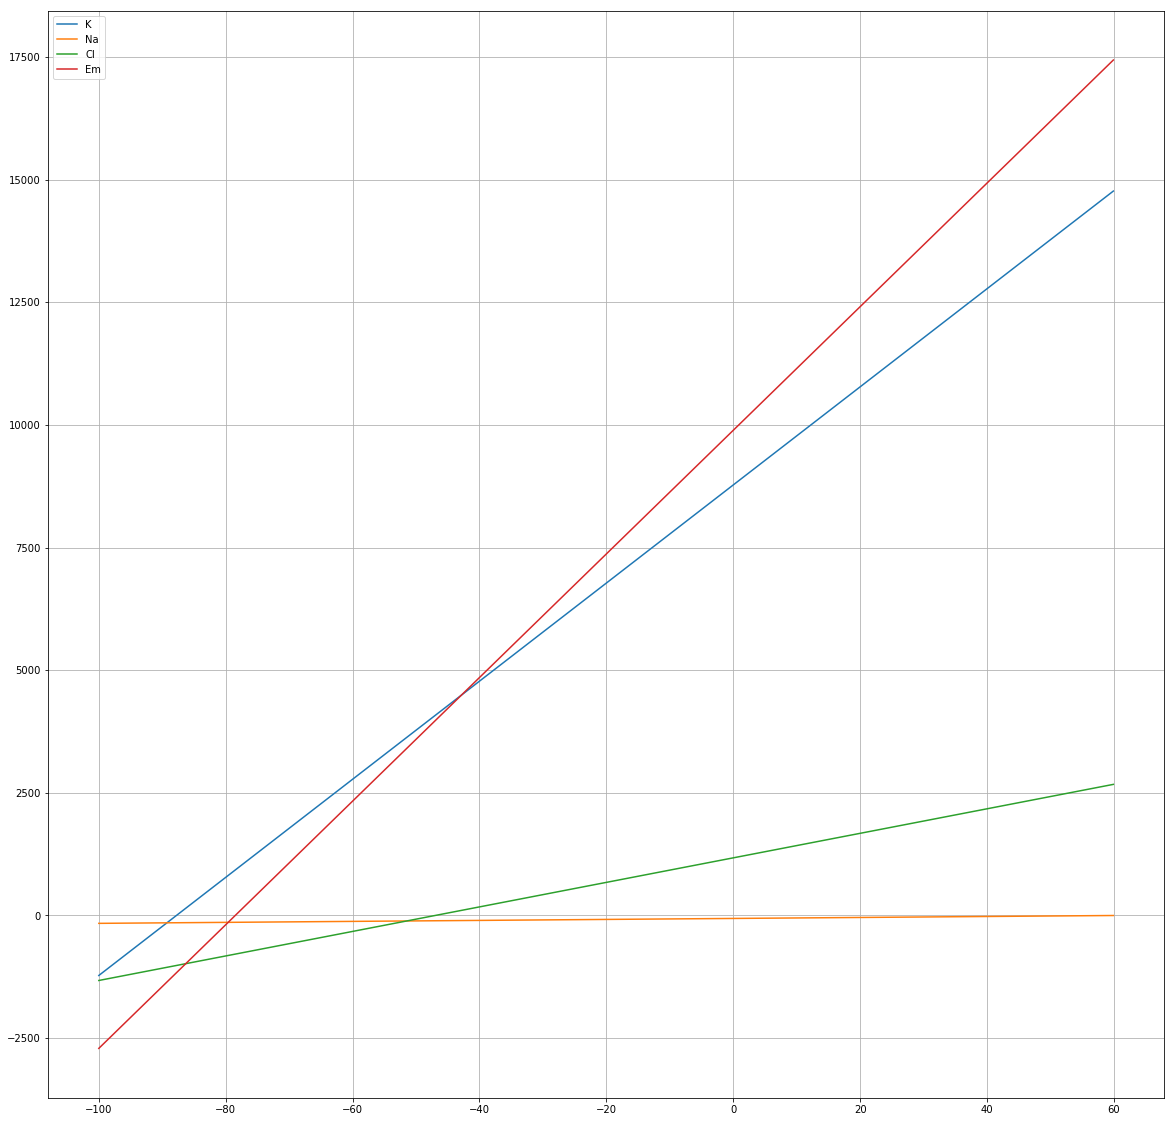

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

x = np.arange(-100, 60, 0.1);

iv_line = lambda G_val, E_x: G_val * x + ((0.0 - E_x) * G_val)

K_line = iv_line(G_K, K_Eq)
Na_line = iv_line(G_Na, Na_Eq)
Cl_line = iv_line(G_Cl, Cl_Eq)
Sum_line = K_line + Na_line + Cl_line
plt.grid(True)
K, = plt.plot(x, K_line, label="K")
Na, = plt.plot(x, Na_line, label="Na")
Cl, = plt.plot(x, Cl_line, label="Cl")
Em, = plt.plot(x, Sum_line, label="Em")
plt.legend(handles=[K, Na, Cl, Em])
plt.show()